In [1]:
%pylab inline
plt.rc('font',size=20)

Populating the interactive namespace from numpy and matplotlib


## MCH example.

In [2]:
from solvers import *
from utils import *

calc_e,mchApproximation = define_ising_mch_helpers()

In [3]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=1000,replace=True,p=p)]
calc_observables = lambda s: pair_corr(s,concat=True)
sisj = calc_observables(sample)

In [4]:
# Declare and call solver.
solver = MCH(n,calc_e=calc_e,calc_observables=calc_observables,
             sample_size=100,sample_method='metropolis',mch_approximation=mchApproximation)
soln = solver.solve(sisj,maxiter=10)
soln = solver.solve(sisj,initial_guess=soln,maxiter=10,
                    learn_params_kwargs={'maxdlamda':.1,'eta':.1})
soln = solver.solve(sisj,initial_guess=soln,maxiter=20,
                    learn_params_kwargs={'maxdlamda':.05,'eta':.05})

Over maxiter
Over maxiter
Solved.


[<matplotlib.text.Text at 0x117cb8ad0>, <matplotlib.text.Text at 0x117a0ad90>]

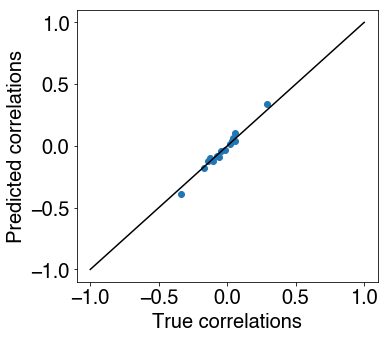

In [5]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## MPF example.

In [6]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [7]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=100,replace=True,p=p)]
sisj = pair_corr(sample,concat=True)

In [8]:
# Declare and call solver.
solver = MPF(n,calc_e=calc_e)
soln = solver.solve(sample)

[<matplotlib.text.Text at 0x118294350>, <matplotlib.text.Text at 0x118262610>]

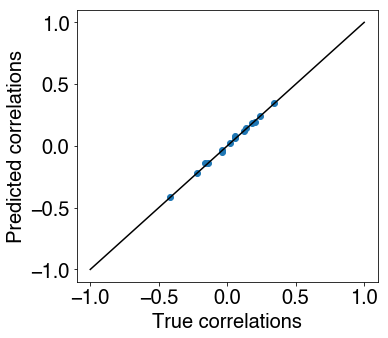

In [9]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln[0]),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## Exact example.

In [10]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [11]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

p = random.rand(2**n)
p /= p.sum()

sisj = pair_corr(allstates,p,concat=True)

In [13]:
# Declare and call solver.
solver = Exact(n,calc_e=calc_e,calc_observables=calc_observables)
soln = solver.solve(constraints=sisj)

[<matplotlib.text.Text at 0x1183d7710>, <matplotlib.text.Text at 0x118440c90>]

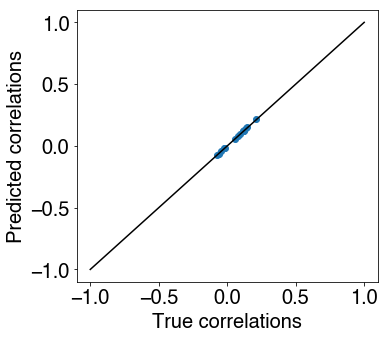

In [14]:
#from tosolve11 import tosolve5

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(soln['x']),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

# Pseudolikelihood

In [15]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [16]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

multipliers = random.normal(scale=.5,size=n*(n-1)//2+n)
p = ising_eqn_5_sym.get_probs(multipliers)

sisj = pair_corr(allstates,p,concat=True)

In [17]:
samples = allstates[random.choice(range(2**n),size=1000,p=p)]

In [18]:
solver = Pseudo(n,calc_e=calc_e,calc_observables=calc_observables)

In [19]:
solver.solve(samples)

Minimizing for r = 0
Optimization terminated successfully.
         Current function value: 116.244905
         Iterations: 29
         Function evaluations: 43
         Gradient evaluations: 71
         Hessian evaluations: 29
Minimizing for r = 1
Optimization terminated successfully.
         Current function value: 149.319181
         Iterations: 51
         Function evaluations: 72
         Gradient evaluations: 122
         Hessian evaluations: 51
Minimizing for r = 2
Optimization terminated successfully.
         Current function value: 349.765418
         Iterations: 135
         Function evaluations: 168
         Gradient evaluations: 302
         Hessian evaluations: 135
Minimizing for r = 3
Optimization terminated successfully.
         Current function value: 149.726771
         Iterations: 149
         Function evaluations: 181
         Gradient evaluations: 329
         Hessian evaluations: 149
Minimizing for r = 4
Optimization terminated successfully.
         Current fun

array([-0.02889561, -0.85069858,  0.00202065,  0.79219604, -0.14393361,
       -1.2856426 , -0.23464257,  0.91978623, -0.01715534,  0.40723644,
        0.63976354, -0.40764913, -0.56333554,  0.04610493,  0.97079228])

[<matplotlib.text.Text at 0x1184c9b50>, <matplotlib.text.Text at 0x1183d71d0>]

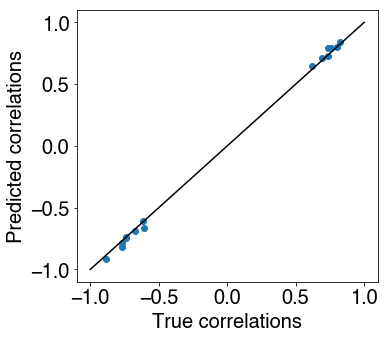

In [20]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(solver.multipliers),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

# Adaptive cluster expansion

In [21]:
from solvers import *
from utils import *

#calc_e,_ = define_ising_mch_helpers()

In [22]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

multipliers = random.normal(scale=.5,size=n*(n-1)//2+n)
p = ising_eqn_5_sym.get_probs(multipliers)

sisj = pair_corr(allstates,p,concat=True)

In [23]:
samples = allstates[random.choice(range(2**n),size=1000,p=p)]

In [24]:
solver = ClusterExpansion(n,calc_e=calc_e,calc_observables=calc_observables)

In [25]:
threshold = 0.001
solver.solve(samples,threshold)

adaptiveClusterExpansion: Clusters of size 2
adaptiveClusterExpansion: Clusters of size 3
adaptiveClusterExpansion: Clusters of size 4
adaptiveClusterExpansion: Clusters of size 5
adaptiveClusterExpansion: Clusters of size 6


array([-0.14343198,  0.26126645, -1.13508147, -0.49189368,  0.60953674,
        1.21685379, -0.35028344, -0.3388927 , -0.67790483, -0.20598558,
        0.62539789, -0.68202705, -0.70137302,  0.19364541,  0.67776595])

[<matplotlib.text.Text at 0x1186400d0>, <matplotlib.text.Text at 0x1184dd250>]

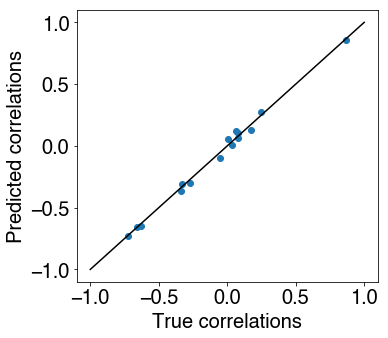

In [26]:
import ising_eqn_5_sym

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,ising_eqn_5_sym.get_stats(solver.multipliers),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')